# LINEAR REGRESSION

## DATABASE USED = FISH MARKET FROM KAGGLE

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Fish.csv")
print(data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


#### Preparing the data

In [3]:
features = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
target = data['Weight']

#### Normalizing the data

In [4]:
features_mean = features.mean()
features_std = features.std()
target_mean = target.mean()
target_std = target.std()

features_normalized = (features - features_mean)/features_std
target_normalized = (target - target_mean)/target_std

In [5]:
#Creating set for training and set for testing at the end

training_set = int(0.8*len(data))
features_train = features_normalized[:training_set]
features_test = features_normalized[training_set:]

target_train = target_normalized[:training_set]
target_test = target_normalized[training_set:]

#### Parameters for training loop

In [31]:
w = np.zeros(features_train.shape[1])
b = 0

#learning rate is called alpha

alpha = 0.01
epochs = 500

#### Training loop

In [32]:
for _ in range(epochs):
    
    y_pred = np.dot(features_train, w) + b

    #using gradient descent

    dw = (1/len(features_train)) * np.dot(features_train.T, (y_pred-target_train))

    db = (1/len(features_train)) * np.sum(y_pred - target_train)


    w -= alpha*dw
    b -= alpha*db

In [33]:
prediction = np.dot(features_test, w) + b

In [34]:
# For easy understanding of output
prediction_denormalized = prediction*target_std + target_mean

target_test_denormalized = target_test*target_std + target_mean

In [35]:
# Calculate Mean squared error

mse = np.mean((prediction_denormalized - target_test_denormalized)**2)
print(f'Mean Squared Error : {mse:.2f}')

Mean Squared Error : 55874.73


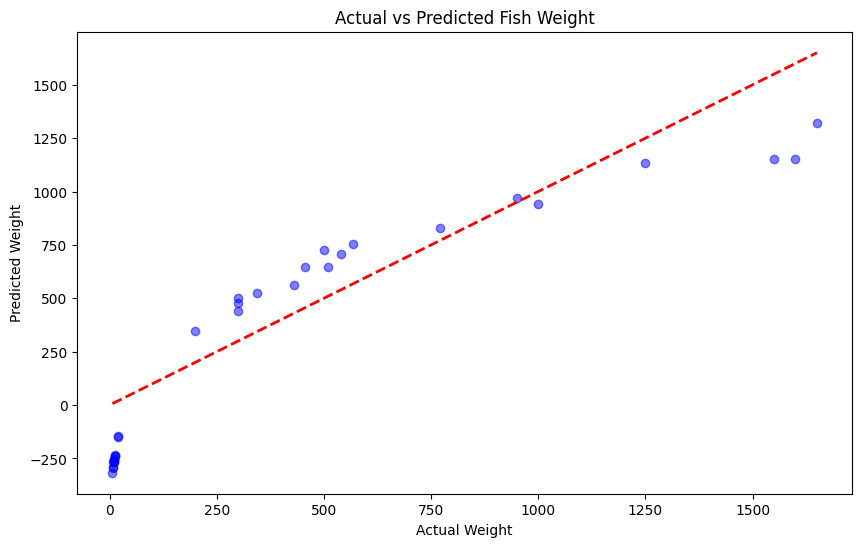

In [36]:
# Plot the results: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(target_test_denormalized, prediction_denormalized, color='blue', alpha=0.5)
plt.plot([target_test_denormalized.min(), target_test_denormalized.max()], 
         [target_test_denormalized.min(), target_test_denormalized.max()], 
         'r--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Fish Weight')
plt.show()

#### Saving the model

In [40]:
np.savez('linear_regression_model.npz', 
         weights=w, 
         bias=b, 
         features_mean=features_mean, 
         features_std=features_std,
         target_mean=target_mean,
         target_std=target_std)

print("Model saved")

# To load the model later, we can use:
# loaded_model = np.load('linear_regression_model.npz')
# w = loaded_model['weights']
# b = loaded_model['bias']

Model saved
